# Predicting Curtomer Attrition- Orange Telecom dataset

Customer attrition prediction has become one of the best Business saving operations to attract customers who are about to leave the services.The orange telecom dataset is fetched from BigML, where the dataset is divided to train & test data. The data is fetched using Spark sql context.

In [1]:
import pandas as pd
import pyspark
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from pyspark import SparkContext,SparkConf
sc = SparkContext.getOrCreate(SparkConf())

from pyspark.sql import SQLContext

sqlcontext = SQLContext(sc)

In [2]:
# Import the data using sqlcontext
orange_train= sqlcontext.read.format('csv').options(header='true', inferSchema='true').load (r"C:\Users\Poojitha\Desktop\protofolio\bigml customer churn\churn-bigml-80.csv")
orange_test= sqlcontext.read.format('csv').options(header='true', inferSchema='true').load (r"C:\Users\Poojitha\Desktop\protofolio\bigml customer churn\churn-bigml-20.csv")

orange_train.printSchema()


root
 |-- State: string (nullable = true)
 |-- Account length: integer (nullable = true)
 |-- Area code: integer (nullable = true)
 |-- International plan: string (nullable = true)
 |-- Voice mail plan: string (nullable = true)
 |-- Number vmail messages: integer (nullable = true)
 |-- Total day minutes: double (nullable = true)
 |-- Total day calls: integer (nullable = true)
 |-- Total day charge: double (nullable = true)
 |-- Total eve minutes: double (nullable = true)
 |-- Total eve calls: integer (nullable = true)
 |-- Total eve charge: double (nullable = true)
 |-- Total night minutes: double (nullable = true)
 |-- Total night calls: integer (nullable = true)
 |-- Total night charge: double (nullable = true)
 |-- Total intl minutes: double (nullable = true)
 |-- Total intl calls: integer (nullable = true)
 |-- Total intl charge: double (nullable = true)
 |-- Customer service calls: integer (nullable = true)
 |-- Churn: boolean (nullable = true)



In [3]:
# Converting to pandas to perform EDA on data
orange_train.count()
orange_train.toPandas().head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


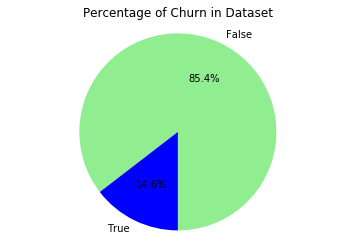

In [4]:
# how the data is distributed
orange_df= orange_train.toPandas()
sizes = orange_df['Churn'].value_counts(sort = True)
colors = ["lightgreen","blue"] 
labels= list(['False','True'])
#rcParams['figure.figsize'] = 4,4
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=270,)
plt.axis('equal')
plt.title('Percentage of Churn in Dataset')
plt.show()

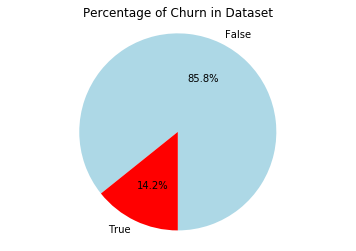

In [5]:
# Test data distribution
orange_test_df= orange_test.toPandas()
sizes = orange_test_df['Churn'].value_counts(sort = True)
colors = ["lightblue","red"] 
labels= list(['False','True'])
#rcParams['figure.figsize'] = 4,4
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=270,)
plt.axis('equal')
plt.title('Percentage of Churn in Dataset')
plt.show()

### Data Preperation & Feature Engineering

In [6]:
# Drop irrelavant columns (state, Area code)
orange_df.drop(['State', 'Area code'], axis=1, inplace= True)
orange_test_df.drop(['State', 'Area code'], axis=1, inplace= True)
orange_df.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
# Converting  categorical data to numerical
cat_map= {'Yes':1.0, 'No':0.0, 'True':1.0, 'False':0.0}
cols=['International plan','Voice mail plan']
orange_df[cols]=  orange_df[cols].replace(cat_map)
orange_test_df[cols]=  orange_test_df[cols].replace(cat_map)
orange_df.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
orange_df['Churn']= orange_df['Churn'].astype(float)
orange_test_df['Churn']=orange_test_df['Churn'].astype(float)

orange_df.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0.0
1,107,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0.0
2,137,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0.0
3,84,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0.0
4,75,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0.0


In [9]:
# Create the pandas dataframe to spark df
orange_sparkdf= sqlcontext.createDataFrame(orange_df)
orange_test_spark=sqlcontext.createDataFrame(orange_test_df)


### Model testing

In [10]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler

In [11]:
orange_sparkdf.columns[0:-1]


['Account length',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

In [27]:
orange_test_spark.columns[0:-1]

['Account length',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

In [12]:
# Separeate the target and feature variables using Vector Assembler for train set

vector_assembler= VectorAssembler(inputCols=orange_sparkdf.columns[0:-1], outputCol='features')
orange_tr=vector_assembler.transform(orange_sparkdf)
orange_tr= orange_tr.select(['features','Churn'])

orange_tr.show(3)
#def labelData(data):
    #return data.rdd.map(lambda row: LabeledPoint(row[-1], row[:-1]))

#labelData(orange_sparkdf)
#training_data, testing_data = lab= orange_tr.select(['features', 'labels'])elData(orange_sparkdf).randomSplit([0.8, 0.2])

+--------------------+-----+
|            features|Churn|
+--------------------+-----+
|[128.0,0.0,1.0,25...|  0.0|
|[107.0,0.0,1.0,26...|  0.0|
|[137.0,0.0,0.0,0....|  0.0|
+--------------------+-----+
only showing top 3 rows



In [28]:
# Separeate the target and feature variables using Vector Assembler for test set
vector_assembler_test= VectorAssembler(inputCols=orange_test_spark.columns[0:-1], outputCol='features')
orange_test=vector_assembler_test.transform(orange_test_spark)
orange_test= orange_test.select(['features','Churn'])

orange_test.show(3)

+--------------------+-----+
|            features|Churn|
+--------------------+-----+
|[117.0,0.0,0.0,0....|  0.0|
|[65.0,0.0,0.0,0.0...|  1.0|
|[161.0,0.0,0.0,0....|  1.0|
+--------------------+-----+
only showing top 3 rows



In [13]:
#split the train and test data
(training_data, testing_data) = orange_tr.randomSplit([0.8, 0.2],seed=100)

In [46]:
# train the model
lr = LogisticRegression(maxIter=10, featuresCol="features", labelCol="Churn")
lrModel = lr.fit(training_data)
#lrModel.summary.areaUnderROC
lrModel.summary.accuracy

0.8639136555607696

In [34]:
#prediction
predictions= lrModel.transform(testing_data)
predictions.select('features','Churn','rawPrediction','probability', 'prediction').show(10)



+--------------------+-----+--------------------+--------------------+----------+
|            features|Churn|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[16.0,0.0,0.0,0.0...|  1.0|[1.71288595297730...|[0.84721023102540...|       0.0|
|[20.0,0.0,0.0,0.0...|  0.0|[3.03234301845038...|[0.95401407345790...|       0.0|
|[21.0,0.0,0.0,0.0...|  0.0|[3.56211949841706...|[0.97240450923659...|       0.0|
|[22.0,0.0,0.0,0.0...|  0.0|[3.65898533575202...|[0.97488820962560...|       0.0|
|[27.0,0.0,0.0,0.0...|  0.0|[1.66008655699795...|[0.84024962196120...|       0.0|
|[31.0,0.0,0.0,0.0...|  0.0|[2.13513110581608...|[0.89427113816004...|       0.0|
|[32.0,0.0,0.0,0.0...|  0.0|[1.34940602977630...|[0.79403250437150...|       0.0|
|[34.0,0.0,0.0,0.0...|  0.0|[3.59040046023435...|[0.97315334558649...|       0.0|
|[35.0,0.0,0.0,0.0...|  0.0|[2.79781143082479...|[0.94255744330567...|       0.0|
|[38.0,0.0,0.0,0

In [44]:
# Evaluate the Model
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol="Churn")
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.7808405507439484
